In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import random
import string

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [5]:
train = pd.read_csv('data/intro_to_ann.csv')

In [6]:
train.head(10)

,Feature1,Feature2,Target
0,2.067788,0.258133,1
1,0.993994,-0.609145,1
2,-0.690315,0.749921,0
3,1.023582,0.529003,0
4,0.700747,-0.496724,1
5,0.955063,0.371061,0
6,-0.051023,0.009787,1
7,2.111669,0.291467,1
8,1.173019,-0.101473,0
9,-0.577947,1.277303,0


In [7]:
train.tail()

,Feature1,Feature2,Target
495,-1.215692,0.453118,0
496,-0.283986,0.108450,1
497,0.859747,-0.593557,1
498,-0.235540,0.951239,0
499,0.304995,-0.571154,1


In [8]:
train.shape

(500, 3)

In [9]:
train.iloc[:,2]  # takes all rows and 3rd column - target data

0      1
1      1
2      0
3      0
4      1
5      0
6      1
7      1
8      0
9      0
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     1
22     1
23     0
24     1
25     1
26     1
27     1
28     1
29     0
      ..
470    0
471    1
472    1
473    0
474    0
475    1
476    0
477    0
478    1
479    1
480    0
481    0
482    1
483    1
484    1
485    0
486    1
487    1
488    0
489    1
490    1
491    1
492    1
493    1
494    0
495    0
496    1
497    1
498    0
499    1
Name: Target, Length: 500, dtype: int64

In [10]:
train.iloc[:,0:2]  # all rows and first two columns - training

,Feature1,Feature2
0,2.067788,0.258133
1,0.993994,-0.609145
2,-0.690315,0.749921
3,1.023582,0.529003
4,0.700747,-0.496724
5,0.955063,0.371061
6,-0.051023,0.009787
7,2.111669,0.291467
8,1.173019,-0.101473
9,-0.577947,1.277303


In [11]:
X, y = np.array(train.iloc[:,0:2]), np.array(train.iloc[:,2])

In [12]:
X

array([[ 2.06778839e+00,  2.58133225e-01],
       [ 9.93994008e-01, -6.09144512e-01],
       [-6.90315436e-01,  7.49920622e-01],
       [ 1.02358238e+00,  5.29003080e-01],
       [ 7.00747058e-01, -4.96724018e-01],
       [ 9.55062941e-01,  3.71061016e-01],
       [-5.10234660e-02,  9.78688300e-03],
       [ 2.11166892e+00,  2.91466670e-01],
       [ 1.17301939e+00, -1.01473076e-01],
       [-5.77947070e-01,  1.27730309e+00],
       [ 9.09597624e-01,  3.63086720e-02],
       [ 2.07773424e+00,  6.29147857e-01],
       [-9.62290964e-01,  8.27233623e-01],
       [ 9.47003591e-01, -2.90186106e-01],
       [ 3.83209976e-01, -3.09917567e-01],
       [-1.50287574e-01,  3.17294355e-01],
       [ 8.03611230e-02,  5.02094351e-01],
       [ 1.20012519e+00, -5.27865179e-01],
       [-9.22386507e-01,  4.65574823e-01],
       [ 5.12394856e-01, -3.34921280e-02],
       [ 6.60176708e-01,  3.54198518e-01],
       [ 9.19878779e-01, -5.93771970e-01],
       [ 1.85474117e-01, -2.14731663e-01],
       [-9.

In [13]:
y

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,

In [14]:
X.shape

(500, 2)

In [15]:
y.shape

(500,)

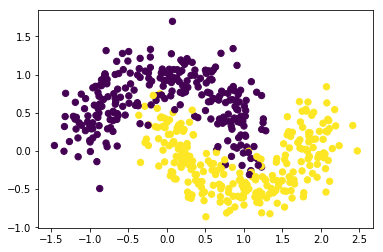

In [16]:
plt.scatter(X[:,0], X[:,1], s=40, c=y)

In [17]:
# function to generate a number between two given numbers
def rand(a, b):
    return (b-a) * random.random() + a

In [18]:
# Make a matrix
def makeMatrix(a,b, fill=0.0):
    return np.zeros([a,b])

In [19]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [20]:
# derivative of sigmoid
def dsigmoid(x):
    return y * (1-y)

In [34]:
class NN:
    
    def __init__(self, no_i, no_h, no_o):
        # number of inputs, hidden and output
        self.no_i = no_i + 1
        self.no_h = no_h
        self.no_o = no_o
        
        # activation for nodes
        self.act_i = [1.0] * no_i
        self.act_h = [1.0] * no_h
        self.act_o = [1.0] * no_o
        
        # create weight
        self.weight_i = makeMatrix(self.no_i, self.no_h)
        self.weight_o = makeMatrix(self.no_h, self.no_o)
        
        
        # initialize random weights for input and hidden layer
        for i in range(self.no_i):
            for j in range(self.no_h):
                self.weight_i[i][j] = rand(-0.2, 0.2)
                
        # initialize random weights for hidden and output layer
        for i in range(self.no_h):
            for j in range(self.no_o):
                self.weight_o[i][j] = rand(-2, 2)
                
        self.change_i = makeMatrix(self.no_i, self.no_h)
        self.change_o = makeMatrix(self.no_h, self.no_o)

    def activate(self, inputs):  # feed forward
        
        # input activation
        for i in range(self.no_i - 1):
            self.act_i[i] = inputs[i]
        
        # hidden activation
        for j in range(self.no_h):
            i_sum = 0
            for i in range(self.no_i - 1):
                i_sum = i_sum + self.act_i[i] * self.weight_i[i][j] # Wx
            self.act_h[j] = sigmoid(i_sum)
            
            
        # output activation
        for k in range(self.no_o):
            o_sum = 0
            for i in range(self.no_h):
                o_sum = o_sum + self.act_h[i] * self.weight_o[i][k] # Wx
            self.act_o[k] = sigmoid(o_sum)
    
    def backprop(self, targets, N, M):
        # calculate for output layer - output to hidden
        output_deltas = np.zeros(self.no_o)
        for i in range(self.no_o):
            errors = targets[i] - self.act_o[i]
            output_deltas[i] = dsigmoid(self.act_o[i]) * errors
        
        # calculate for hidden layer - hidden to input
        hidden_deltas = np.zeros(self.no_h)
        for j in range(self.no_h):
            error = 0.0
            for k in range(self.no_o):
                error = error + output_deltas[k] * self.weight_o[j][k]
            hidden_deltas[j] = dsigmoid(self.act_h[j]) * error
            
        # update output->hidden weight
        for j in range(self.no_h):
            for k in range(self.no_o):
                change = output_deltas[k] * self.act_h[j]
                self.weight_o[j][k] = self.weight_o[j][k] * N * change + M * self.change_o[j][k]
                self.change_o[j][k] = change
                
        # update hidden->input weight
        for j in range(self.no_i):
            for k in range(self.no_h):
                change = hidden_deltas[k] * self.act_i[j]
                self.weight_i[j][k] = self.weight_i[j][k] * N * change + M * self.change_i[j][k]
                self.change_i[j][k] = change
                
                
        # calculate error
        loss = 0
        for k in range(len(targets)):
            loss = loss + 0.5 * (targets[k] - self.act_o[k]) ** 2
        
        return loss
                                                       

    def test(self, patterns):
        self.predict = np.empty([len(patterns), self.no_o])
        for i, p in enumerate(patterns):
            self.predict[i] = self.activate(p)
            
    def train(self, patterns, iterations= 1000, N = 0.5, M = 0.1):
        patterns = list(patterns)
        final_loss = 0.0
        for i in range(iterations):
            loss = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.activate(inputs)
                loss = loss + self.backprop([targets], N, M)
            if (i%20)==0:
                print('error in iteration %d : %-.5f' %(i, loss))
            final_loss = loss
        
        print("Final error {}".format(loss))

In [35]:
n = NN(2, 1, 1)

In [37]:
n.train(zip(X,y), iterations=100, N = 0.01)

ValueError: setting an array element with a sequence.